In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''
   HR dataset EDA and ML Implmentation
'''

# Ownership
__author__ = ["M. Haseeb Hassan"]
__copyright__ = ["Copyrights @ hacceebhassan"]
__license__ = "MIT"
__version__ = "1.0.1"
__maintainer__ = "M. Haseeb Hassan"
__email__ = "hacceebhassan@gmail.com"
__status__ = "Development"

# Human Resource Dataset (Analysis and Prediction)

### Dataset Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [ ]:
#Write code here
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [ ]:
# Load the data
data= pd.read_csv('data/HR_data.csv')
df=data.copy()

In [ ]:
# Find the shape
df.shape

(14999, 10)

In [ ]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [ ]:
# Find the basic statistics
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [ ]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

In [ ]:
# Count of how many employees left the company
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

**Task 3: Find out the number of projects being handled.**

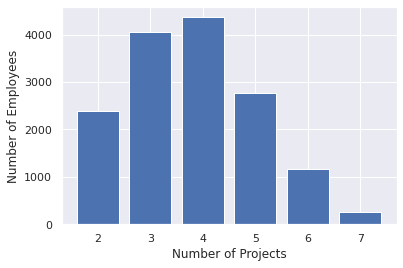

In [ ]:
# Write code here
num_projects=df.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

**Question: What insights can you infer from the above plot?**

Answer: 

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>
*Hint:* For this purpose, we can do a groupby.

In [ ]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Task 5:** Make a plot of your findings (only turn-over employees)

[Text(0, 0.5, 'Percent')]

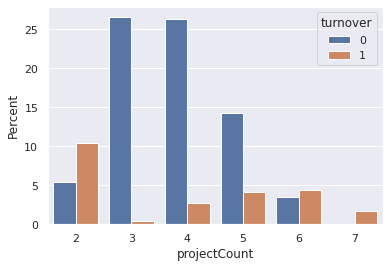

In [ ]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: 
This graph is quite interesting as well. Here's what I found:

- More than half of the employees with 2,6, and 7 projects left the company
- Majority of the employees who did not leave the company had 3,4, and 5 projects
- All of the employees with 7 projects left the company
- There is an increase in employee turnover rate as project count increases

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the percetage to show that after how much time/years did most of employees exactly leave.*

[Text(0, 0.5, 'Percent')]

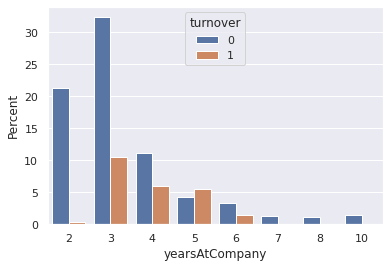

In [ ]:
# Show the plot for the count of years here
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

**Question: What is the maximum number of time spend by the employees?**

Answer: 
10 Years

**Question: After what time period are employees most likely to leave the company ?**

Answer:
Between 2 - 5 years of time

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

Text(0.5, 1.0, 'No. of employee')

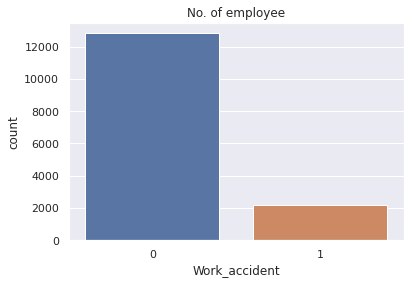

In [ ]:
# Number of employees involved in work accident
feature='Work_accident'
sns.countplot(x=feature, data = data)
plt.title("No. of Employees")

**Question: What can you conclude from the graph above?**

Answer: 
Very small number of employees are involved in work accident

[Text(0, 0.5, 'Percent')]

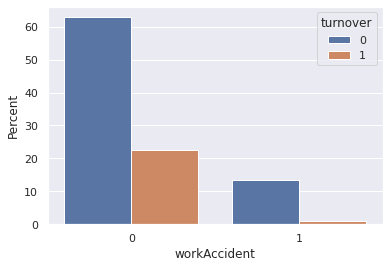

In [ ]:
# Number of employees involved in work accident and left or not left
ax = sns.barplot(x="workAccident", y="workAccident", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

Text(0.5, 1.0, 'No. of Employees')

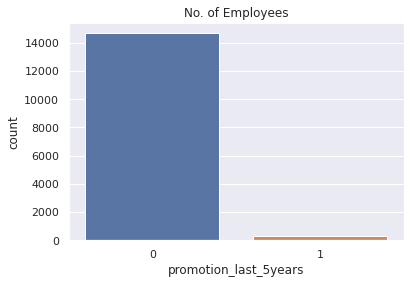

In [ ]:
# Number of Employees Promoted
feature='promotion_last_5years'
sns.countplot(x=feature, data = data)
plt.title("No. of Employees")

[Text(0, 0.5, 'Percent')]

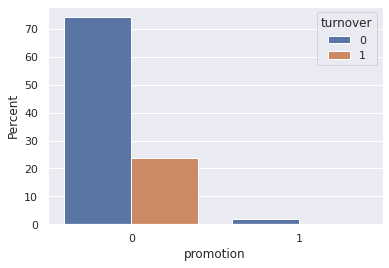

In [ ]:
# Number of employees involved in promotion and left or not left
ax = sns.barplot(x="promotion", y="promotion", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

Text(0.5, 1.0, 'No. of Employees')

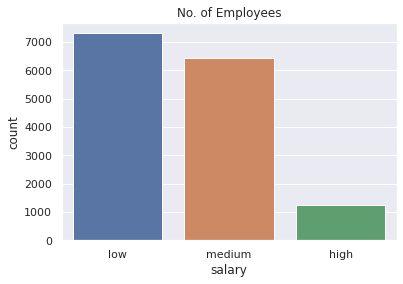

In [ ]:
#Write code here
feature='salary'
sns.countplot(x=feature, data = data)
plt.title("No. of Employees")

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

[Text(0, 0.5, 'Count')]

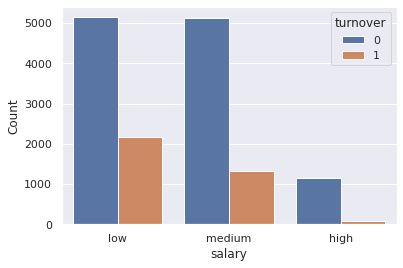

In [ ]:
# Write code here
ax = sns.countplot(x="salary", hue="turnover", data=df)
ax.set(ylabel="Count")


**Question: What does the above plot show?**

Answer:
The employees with high salaries are less-likely to leave

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

In [ ]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
df = df.rename(columns={'sales':'department'})


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

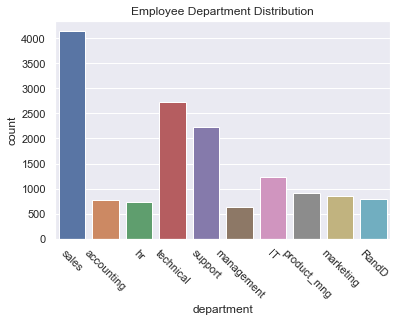

In [ ]:
sns.countplot(x='department', data=df).set_title('Employee Department Distribution');
plt.xticks(rotation=-45)

**Question: Which department has maximum number of employees?**

Answer:
Sales Department

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

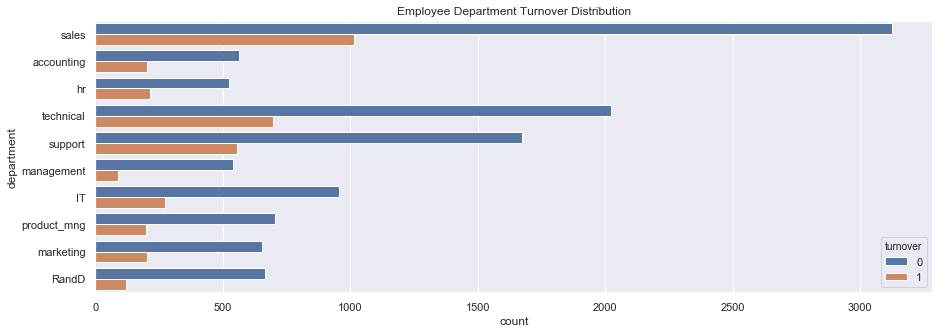

In [ ]:
# Write code here
df = df.rename(columns={'left':'turnover'})

f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

[Text(0, 0.5, 'Percent')]

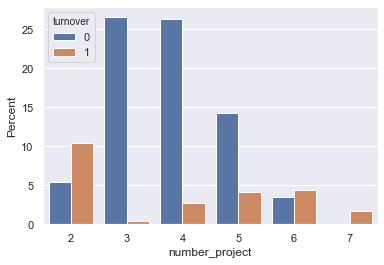

In [ ]:
ax = sns.barplot(x="number_project", y="number_project", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Answer: More than half of the employees with 2,6, and 7 projects left the company.Majority of the employees who did not leave the company had 3,4, and 5 projects.All of the employees with 7 projects left the company.There is an increase in employee turnover rate as project count increases

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

[Text(0, 0.5, 'Last Evaluation'), Text(0.5, 0, 'Satisfaction Level')]

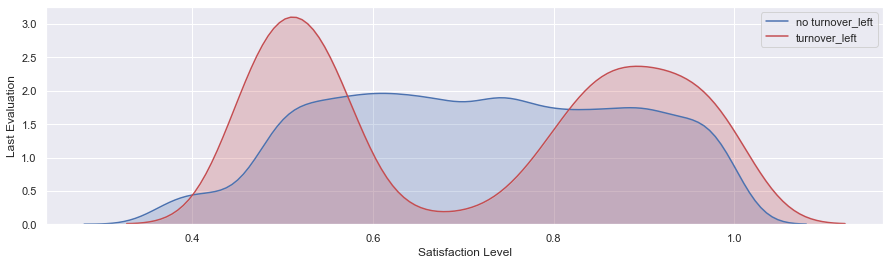

In [ ]:
# Write the code here
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover_left')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover_left')
ax.set(xlabel='Satisfaction Level', ylabel='Last Evaluation')


**Question: What can you conclude from the plot above?**

Answer:

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [ ]:
# Write the code here
satisfaction_level_type = []
sat = df['satisfaction'].tolist()
for i in sat:
  if i >= 0.5:
    satisfaction_level_type.append('High')
  else:
    satisfaction_level_type.append('Low')
df = df.assign(satisfaction_level_type = satisfaction_level_type)
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


In [ ]:
# Write the code here to make bins as mentioned above
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] >= 0.5),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] < 0.5),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

**Task 12: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

[Text(0, 0.5, 'Count')]

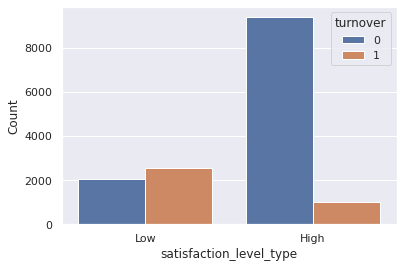

In [ ]:
# Write code here
ax = sns.countplot(x="satisfaction_level_type", hue="turnover", data=df)
ax.set(ylabel="Count")


Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

**Make a Plot of your findings**

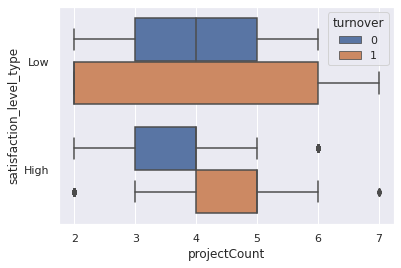

In [ ]:
import seaborn as sns
sns.boxplot(x='projectCount', y='satisfaction_level_type', hue='turnover', data=df)

**Question:** What did you infer drom the above plot

**Answer:**

**Task 13: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [ ]:
employee_type = []
sat = df['projectCount'].tolist()
for i in sat:
  if i == 2:
    employee_type.append('Unburdened')
  elif 3<= i <= 5:
    employee_type.append('Satisfactory')
  elif i >= 6:
    employee_type.append('Burdened')
  else:
    employee_type.append('')
df = df.assign(employee_type = employee_type)
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,dept,salary,satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,Unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,Burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,Satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,Unburdened


**Task 14: Make a countplot to see which type of employee is leaving**

[Text(0, 0.5, 'Count')]

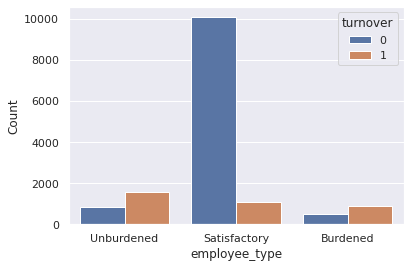

In [ ]:
# Write code here
ax = sns.countplot(x="employee_type", hue="turnover", data=df)
ax.set(ylabel="Count")


# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 15: Do ONE HOT ENCODING of the above mentioned variables**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })
df.head

<bound method NDFrame.head of        satisfaction  evaluation  ...     dept  salary
0              0.38        0.53  ...    sales     low
1              0.80        0.86  ...    sales  medium
2              0.11        0.88  ...    sales  medium
3              0.72        0.87  ...    sales     low
4              0.37        0.52  ...    sales     low
...             ...         ...  ...      ...     ...
14994          0.40        0.57  ...  support     low
14995          0.37        0.48  ...  support     low
14996          0.37        0.53  ...  support     low
14997          0.11        0.96  ...  support     low
14998          0.37        0.52  ...  support     low

[14999 rows x 10 columns]>

In [ ]:
# Write code here
# Convert these variables into categorical variables
df["dept"] = df["dept"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)

**Task 16: Creating Independant and Dependant Variables**

In [ ]:
# Write code here
# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['satisfaction', 'evaluation', 'yearsAtCompany', 'int', 'turnover']
df = df[indep_var]

**Task 17: Perform Train Test Split with test size 30 percent and random state = 100**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Write code here
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100, stratify=y)

X_train.head()



,satisfaction,evaluation,yearsAtCompany,int
9037,0.31,0.72,3,1
2205,0.70,0.69,4,1
3671,0.70,0.70,3,1
8164,1.00,0.87,2,1
13212,0.70,0.59,3,1


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10499, 4) (10499,)
(4500, 4) (4500,)


**Task 18: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

In [ ]:
# Importing the models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

## Random Forest

In [ ]:
# Making instance and training the model
# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Get predictions
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))



 ---Random Forest Model---


**Precision**

In [ ]:
# Write the code to import the function for calculation of the specific score
print ("Random Forest Model Precision Score is %2.2f" % precision_score(y_test,rf.predict(X_test)))

Random Forest Model Precision is 0.95


**Accuracy**

In [ ]:
# Write the code to import the function for calculation of the specific score
print ("Random Forest Model Accuracy Score is %2.2f" % accuracy_score(y_test,rf.predict(X_test)))

Random Forest Model Accuracy is 0.98


**Recall**

In [ ]:
# Write the code to import the function for calculation of the specific score
print ("Random Forest Model Recall Score is %2.2f" % recall_score(y_test,rf.predict(X_test)))

Random Forest Model Recall Score is 0.94


**F1-Score**

In [ ]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score
print ("Random Forest Model F1-Score is %2.2f" % f1_score(y_test,rf.predict(X_test)))

Random Forest Model F1-Score is 0.95


**Classification Report**

In [ ]:
# Write the code to import the function for calculation of the specific score
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))

Random Forest AUC = 0.96
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3429
           1       0.95      0.94      0.95      1071

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



## Logistic Regression

In [ ]:
# Create instance and train, random _state=100
model = LogisticRegression(penalty='l2', C=1, random_state = 100)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# get the predictions
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Accuracy**

In [ ]:
#Write the code here
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.77


**Precision**

In [ ]:
#Write the code here
print ("Logistic precision is %2.2f" % precision_score(y_test, model.predict(X_test)))

Logistic precision is 0.54


**Recall**

In [ ]:
#Write the code here
print ("Logistic recall is %2.2f" % recall_score(y_test, model.predict(X_test)))

Logistic recall is 0.26


**F1 Score**

In [ ]:
#Write the code here
print ("Logistic F1-Score is %2.2f" % f1_score(y_test, model.predict(X_test)))

Logistic F1-Score is 0.35


**Classification Report**

In [ ]:
#Write the code here
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model.predict(X_test)))

Logistic AUC = 0.60
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3429
           1       0.54      0.26      0.35      1071

    accuracy                           0.77      4500
   macro avg       0.67      0.60      0.61      4500
weighted avg       0.74      0.77      0.74      4500



## Ada Boost

In [ ]:
#Write the code here to make an instance and train the model with random state =100
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1, random_state = 100)


In [ ]:
# Get the predictions
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=400, random_state=100)

**Accuracy**

In [ ]:
#Write code here
print ("Ada Boost accuracy is %2.2f" % accuracy_score(y_test, ada.predict(X_test)))

Ada Boost accuracy is 0.94


**Precision**

In [ ]:
#Write code here
print ("Ada Boost precision is %2.2f" % precision_score(y_test, model.predict(X_test)))

Ada Boost precision is 0.54


**Recall**

In [ ]:
#Write code here
print ("Ada Boost Recall is %2.2f" % recall_score(y_test, model.predict(X_test)))

Ada Boost Recall is 0.26


**F1-Score**

In [ ]:
#Write code here
print ("Ada Boost F1-Score is %2.2f" % f1_score(y_test, model.predict(X_test)))

Ada Boost F1-Score is 0.35


**Classification Report**

In [ ]:
#Write code here
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

AdaBoost AUC = 0.91
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3429
           1       0.91      0.85      0.88      1071

    accuracy                           0.94      4500
   macro avg       0.93      0.91      0.92      4500
weighted avg       0.94      0.94      0.94      4500



## XG Boost

In [ ]:
#Write the code here to import the model
import xgboost as xgb

In [ ]:
#Write the code here to make an instance and train the model with random state =100
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=100)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Get the predictions
pred_clf_xgb= xgb_model.predict(X)

**Accuracy**

In [ ]:
#Write code here
print ("XG Boost accuracy is %2.2f" % accuracy_score(y_test, xgb_model.predict(X_test)))

XG Boost accuracy is 0.97


**Precision**

In [ ]:
#Write code here
print ("XG Boost presicion is %2.2f" % precision_score(y_test, xgb_model.predict(X_test)))

XG Boost presicion is 0.94


**Recall**

In [ ]:
#Write code here
print ("XG Boost Recall is %2.2f" % recall_score(y_test, xgb_model.predict(X_test)))

XG Boost Recall is 0.92


**F1-Score**

In [ ]:
#Write code here
print ("XG Boost F1-Score is %2.2f" % f1_score(y_test, xgb_model.predict(X_test)))

XG Boost F1-Score is 0.93


**Classification Report**

In [ ]:
#Write code here
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict(X_test))
print ("AdaBoost AUC = %2.2f" % xgb_roc_auc)
print(classification_report(y_test, xgb_model.predict(X_test)))

AdaBoost AUC = 0.95
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3429
           1       0.94      0.92      0.93      1071

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.97      0.97      0.97      4500



# Result Comparisons

**Task 19: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [ ]:
# Write the code here
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))

print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model.predict(X_test)))

print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

print ("AdaBoost AUC = %2.2f" % xgb_roc_auc)
print(classification_report(y_test, xgb_model.predict(X_test)))

Random Forest AUC = 0.96
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3429
           1       0.95      0.94      0.95      1071

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500

Logistic AUC = 0.60
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3429
           1       0.54      0.26      0.35      1071

    accuracy                           0.77      4500
   macro avg       0.67      0.60      0.61      4500
weighted avg       0.74      0.77      0.74      4500

AdaBoost AUC = 0.91
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3429
           1       0.91      0.85      0.88      1071

    accuracy                           0.94      4500
   macro avg       0.93      0.91      0.92      4500
weighted 

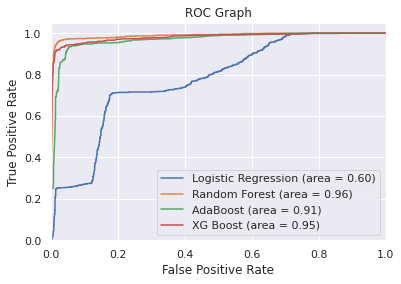

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot XGBoost ROC
plt.plot(dt_fpr, dt_tpr, label='XG Boost (area = %0.2f)' % xgb_roc_auc)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

**Task 20: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: 

In [ ]:
The Random Forest has the best score!